In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('updated_pollution_dataset.csv')

In [3]:
df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


In [5]:
df.describe()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,30.029020,70.056120,20.142140,30.218360,26.412100,10.014820,1.500354,8.425400,497.423800
std,6.720661,15.863577,24.554546,27.349199,8.895356,6.750303,0.546027,3.610944,152.754084
min,13.400000,36.000000,0.000000,-0.200000,7.400000,-6.200000,0.650000,2.500000,188.000000
25%,25.100000,58.300000,4.600000,12.300000,20.100000,5.100000,1.030000,5.400000,381.000000
50%,29.000000,69.800000,12.000000,21.700000,25.300000,8.000000,1.410000,7.900000,494.000000
75%,34.000000,80.300000,26.100000,38.100000,31.900000,13.725000,1.840000,11.100000,600.000000
max,58.600000,128.100000,295.000000,315.800000,64.900000,44.900000,3.720000,25.800000,957.000000


In [6]:
df['Air Quality'].value_counts()

Air Quality
Good         2000
Moderate     1500
Poor         1000
Hazardous     500
Name: count, dtype: int64

In [7]:
maping = {'Good': 0, 'Moderate': 1, 'Poor': 2, 'Hazardous': 3}
df['Air Quality'] = df['Air Quality'].map(maping)

X = df.drop('Air Quality', axis=1)
y = df['Air Quality']

In [8]:
X.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303


## visualization

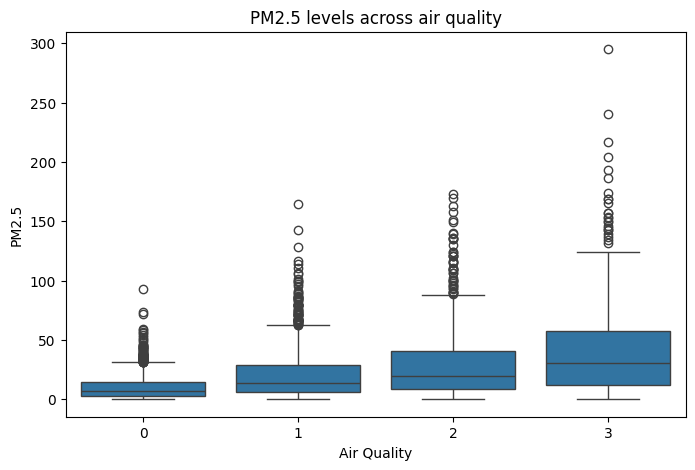

In [9]:
# A boxplot to compare PM2.5 levels across different Air Quality categories

plt.figure(figsize=(8, 5))
sns.boxplot(x='Air Quality', y='PM2.5', data=df)
plt.title('PM2.5 levels across air quality')
plt.show()


## correlation 

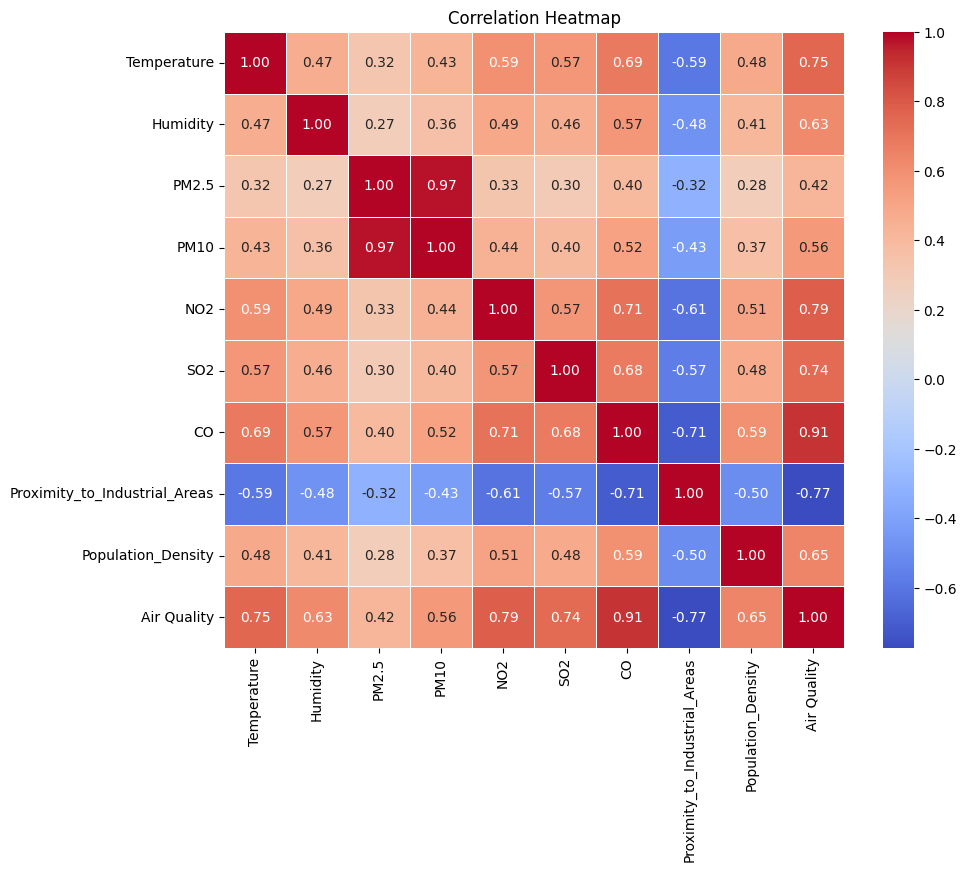

In [10]:
corr_matrix = df.corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X = df.drop(['Air Quality', 'PM10'], axis=1)
y = df['Air Quality']

# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()


X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) 

print('X_train_scaled shape', X_train_scaled.shape)
print('X_test_scaled shape', X_test_scaled.shape)

X_train_scaled shape (4000, 8)
X_test_scaled shape (1000, 8)


In [12]:
# training model
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(class_weight='balanced', random_state=42)
RF.fit(X_train_scaled, y_train) 



,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Accuracy: 0.958
classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       409
           1       0.96      0.97      0.97       294
           2       0.88      0.90      0.89       186
           3       0.93      0.86      0.90       111

    accuracy                           0.96      1000
   macro avg       0.94      0.93      0.94      1000
weighted avg       0.96      0.96      0.96      1000



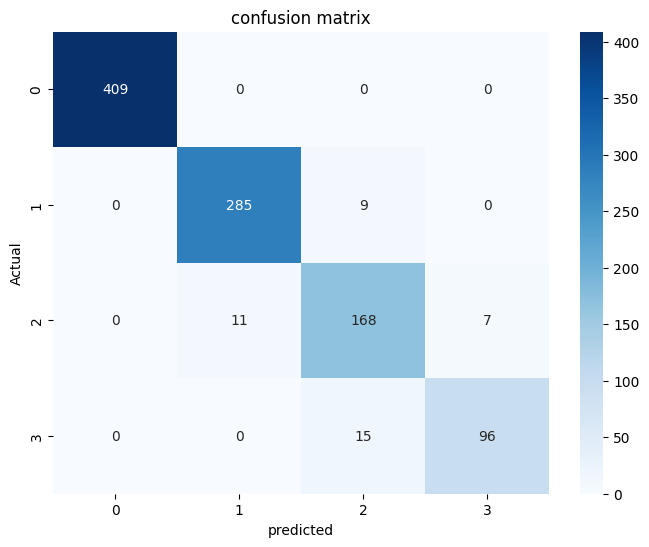

In [13]:
# Evaluating
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = RF.predict(X_test_scaled) # لاحظ استخدمنا الداتا الجديدة هنا
print('Accuracy:', accuracy_score(y_test, y_pred))
print('classification report:\n', classification_report(y_test, y_pred))

# confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('confusion matrix')
plt.xlabel('predicted')
plt.ylabel('Actual')
plt.show()

## Feature Importance

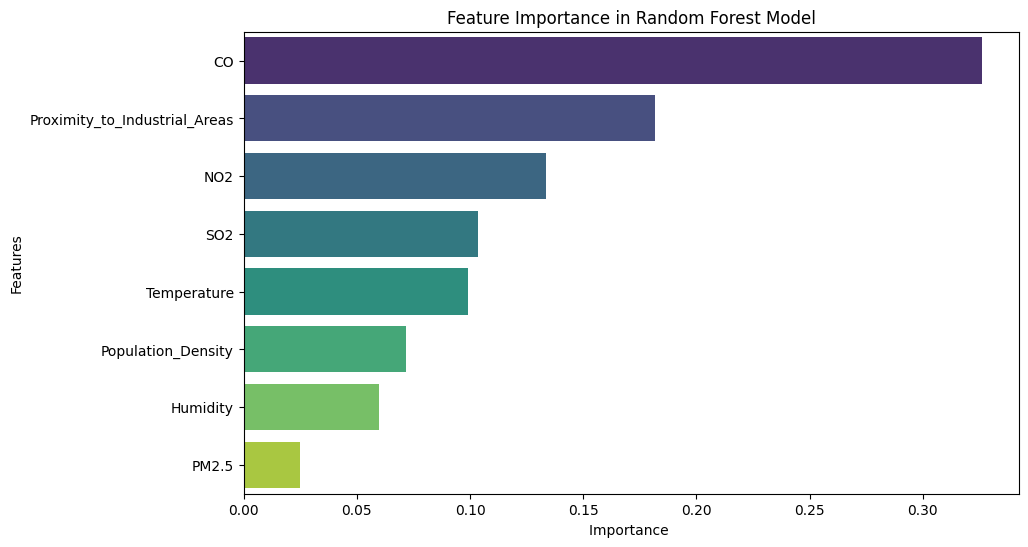

In [14]:
importances = RF.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

# sorting by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Bar Chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis', hue='Feature', legend=False)
plt.title('Feature Importance in Random Forest Model')
plt.xlabel('Importance ')
plt.ylabel('Features')
plt.show()

## Trying Additional Models 

To ensure we are achieving the best possible performance, we will test two powerful **Boosting** algorithms (Gradient Boosting & XGBoost). 



In [15]:
# 1. Gradient Boosting Model
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_scaled, y_train)
gb_pred = gb_model.predict(X_test_scaled)
gb_accuracy = accuracy_score(y_test, gb_pred)
print(f"Gradient Boosting Accuracy: {gb_accuracy:.4f}\n")

Gradient Boosting Accuracy: 0.9530



In [16]:
# 2. XGBoost Model
from xgboost import XGBClassifier

xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_scaled, y_train)
xgb_pred = xgb_model.predict(X_test_scaled)
xgb_accuracy = accuracy_score(y_test, xgb_pred)
print(f"XGBoost Accuracy: {xgb_accuracy:.4f}")

XGBoost Accuracy: 0.9590


## Model Selection & Conclusion
After comparing the three models, **XGBoost** outperformed the others with the highest accuracy of **95.9%**. Therefore, we select it as our final model and will proceed to save it for future deployment.

In [17]:
import joblib

joblib.dump(xgb_model, 'air_quality_xgb_model.pkl')

joblib.dump(scaler, 'scaler.pkl')

print("SAVED")


SAVED
